In [2]:
%run ./ml_model_init.ipynb

## Baseline Model


In [3]:
# Split the gk data into train and test sets
for_splits = split_data(fwd_player_data)

#### Linear Model


In [4]:

base_for_lin_reg = Linear_regression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = pd.DataFrame({"base_for_lin_reg": [base_for_lin_reg['train_RMSE'], base_for_lin_reg['test_RMSE'], base_for_lin_reg['cv_rmse'], base_for_lin_reg['R2_train'], base_for_lin_reg['R2_test']]},
                                                        index=(['train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

for_evaluation_stats

Training set RMSE: 0.9167364628968032
Test set RMSE: 0.8493142544414622
Training set R2: 0.8795567256018533
Test set R2: 0.9059879497043225
count    10.000000
mean      0.934407
std       0.060554
min       0.840858
25%       0.902054
50%       0.942203
75%       0.974640
max       1.031583
dtype: float64


,base_for_lin_reg
train_RMSE,0.916736
test_RMSE,0.849314
cv_rmse,0.934407
R2_train,0.879557
R2_test,0.905988


#### DecisionTree Model


In [5]:
base_for_dt_reg = DecisionTreeRegression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_dt_reg = [base_for_dt_reg['train_RMSE'], base_for_dt_reg['test_RMSE'], base_for_dt_reg['cv_rmse'], base_for_dt_reg['R2_train'], base_for_dt_reg['R2_test']])

for_evaluation_stats



Training set RMSE: 3.6468834126663514e-15
Test set RMSE: 1.6655910507645917
Training set R2: 1.0
Test set R2: 0.6384374377255717


count    10.000000
mean      1.563492
std       0.162121
min       1.290994
25%       1.462660
50%       1.550720
75%       1.660565
max       1.848292
dtype: float64


,base_for_lin_reg,base_for_dt_reg
train_RMSE,0.916736,3.646883e-15
test_RMSE,0.849314,1.665591e+00
cv_rmse,0.934407,1.563492e+00
R2_train,0.879557,1.000000e+00
R2_test,0.905988,6.384374e-01


#### RandomForest Model


In [6]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_for_rf_reg = RandomForestRegression(for_splits['feature_train'], for_splits['features_test'],
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_rf_reg = [base_for_rf_reg['train_RMSE'], base_for_rf_reg['test_RMSE'], base_for_rf_reg['cv_rmse'], base_for_rf_reg['R2_train'], base_for_rf_reg['R2_test']])

for_evaluation_stats

count    10.000000
mean      1.160216
std       0.092032
min       1.065126
25%       1.104121
50%       1.123768
75%       1.225894
max       1.343157
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg
train_RMSE,0.916736,3.646883e-15,0.664471
test_RMSE,0.849314,1.665591e+00,1.183077
cv_rmse,0.934407,1.563492e+00,1.160216
R2_train,0.879557,1.000000e+00,0.936723
R2_test,0.905988,6.384374e-01,0.817580


#### XgBoost Model


In [7]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_for_xgb_reg = XGBoostRegression(for_splits['feature_train'], for_splits['features_test'], for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(base_for_xgb_reg = [base_for_xgb_reg['train_RMSE'], base_for_xgb_reg['test_RMSE'], base_for_xgb_reg['cv_rmse'], base_for_xgb_reg['R2_train'], base_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706
R2_train,0.879557,1.000000e+00,0.936723,0.882534
R2_test,0.905988,6.384374e-01,0.817580,0.817961


# Feature engineering


### VarianceThreshold


In [19]:
VT_scaler = StandardScaler()
df_for_train_scaled = pd.DataFrame(VT_scaler.fit_transform(for_splits['feature_train']), columns=for_splits['feature_train'].columns)
df_for_test_scaled = pd.DataFrame(VT_scaler.transform(for_splits['features_test']), columns=for_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_for_train_scaled)

for_threshold_columns = df_for_train_scaled.columns[selector.get_support()]

for_threshold_train = df_for_train_scaled[for_threshold_columns]
for_threshold_test = df_for_test_scaled[for_threshold_columns]

for_threshold_train.shape, for_threshold_test.shape

((1736, 18), (434, 18))

#### Model(VT)


##### Linear Model


In [20]:

VarT_for_lin_reg = Linear_regression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_lin_reg =  [VarT_for_lin_reg['train_RMSE'], VarT_for_lin_reg['test_RMSE'], VarT_for_lin_reg['cv_rmse'], VarT_for_lin_reg['R2_train'], VarT_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 0.9167364628968032
Test set RMSE: 0.8493142544414656
Training set R2: 0.8795567256018533
Test set R2: 0.9059879497043218
count    10.000000
mean      0.934407
std       0.060554
min       0.840858
25%       0.902054
50%       0.942203
75%       0.974640
max       1.031583
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.647756e-15,0.665696,0.905335
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.654487e+00,1.190641,1.181840
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.584528e+00,1.161938,1.177706
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,6.432423e-01,0.815240,0.817961


##### DecisionTree Model


In [21]:
VarT_for_dt_reg = DecisionTreeRegression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_dt_reg = [VarT_for_dt_reg['train_RMSE'], VarT_for_dt_reg['test_RMSE'], VarT_for_dt_reg['cv_rmse'], VarT_for_dt_reg['R2_train'], VarT_for_dt_reg['R2_test']])

for_evaluation_stats



Training set RMSE: 3.648129230832937e-15
Test set RMSE: 1.7695582515221007
Training set R2: 1.0
Test set R2: 0.5918907623497109
count    10.000000
mean      1.586161
std       0.228525
min       1.220043
25%       1.508435
50%       1.564966
75%       1.777287
max       1.873145
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961


##### RandomForest Model


In [22]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_for_rf_reg = RandomForestRegression(for_threshold_train, for_threshold_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_rf_reg = [VarT_for_rf_reg['train_RMSE'], VarT_for_rf_reg['test_RMSE'], VarT_for_rf_reg['cv_rmse'], VarT_for_rf_reg['R2_train'], VarT_for_rf_reg['R2_test']])

for_evaluation_stats

count    10.000000
mean      1.161938
std       0.092668
min       1.070029
25%       1.105915
50%       1.123310
75%       1.229717
max       1.347967
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961


##### XgBoost Model


In [23]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_for_xgb_reg = XGBoostRegression(for_threshold_train, for_threshold_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(VarT_for_xgb_reg = [VarT_for_xgb_reg['train_RMSE'], VarT_for_xgb_reg['test_RMSE'], VarT_for_xgb_reg['cv_rmse'], VarT_for_xgb_reg['R2_train'], VarT_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961


### Feature selection techniques


#### K-best features


In [25]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, for_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(for_threshold_train, for_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, for_splits['target_train'])

  k_sel_cols = for_threshold_train.columns[selector.get_support()]
  k_sel_X_test = for_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, for_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.687, 0.687, 0.708, 0.761, 0.806, 0.757, 0.773, 0.769, 0.788, 0.78, 0.783, 0.807, 0.778, 0.771, 0.773, 0.793, 0.793] 11


In [26]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(for_threshold_train, for_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = for_threshold_train[sel_feats]
k_sel_X_test = for_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [27]:

KBest_for_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_lin_reg =  [KBest_for_lin_reg['train_RMSE'], KBest_for_lin_reg['test_RMSE'], KBest_for_lin_reg['cv_rmse'], KBest_for_lin_reg['R2_train'], KBest_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 0.958572986160969
Test set RMSE: 0.88553986712909
Training set R2: 0.8683126936587129
Test set R2: 0.8977971670916076
count    10.000000
mean      0.971727
std       0.078219
min       0.858757
25%       0.921041
50%       0.977911
75%       1.042759
max       1.060011
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797


###### DecisionTree Model


In [28]:
KBest_for_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_dt_reg = [KBest_for_dt_reg['train_RMSE'], KBest_for_dt_reg['test_RMSE'], KBest_for_dt_reg['cv_rmse'], KBest_for_dt_reg['R2_train'], KBest_for_dt_reg['R2_test']])

for_evaluation_stats



Training set RMSE: 4.197828668140863e-15
Test set RMSE: 1.5796808871000259
Training set R2: 1.0
Test set R2: 0.6747738746318889
count    10.000000
mean      1.600419
std       0.185771
min       1.266273
25%       1.525016
50%       1.598268
75%       1.716515
max       1.897671
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01


###### RandomForest Model


In [29]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_for_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_rf_reg = [KBest_for_rf_reg['train_RMSE'], KBest_for_rf_reg['test_RMSE'], KBest_for_rf_reg['cv_rmse'], KBest_for_rf_reg['R2_train'], KBest_for_rf_reg['R2_test']])

for_evaluation_stats

count    10.000000
mean      1.190240
std       0.107636
min       1.067972
25%       1.111633
50%       1.156300
75%       1.264402
max       1.404682
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120


###### XgBoost Model


In [30]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_for_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(KBest_for_xgb_reg = [KBest_for_xgb_reg['train_RMSE'], KBest_for_xgb_reg['test_RMSE'], KBest_for_xgb_reg['cv_rmse'], KBest_for_xgb_reg['R2_train'], KBest_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620


#### Mutual Information


In [31]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, for_splits['target_train'])
mutual_info

array([0.47275919, 0.30206504, 0.09097975, 0.25069347, 0.2063641 ,
       0.28887259, 0.51973531, 0.27624281, 0.0772582 , 0.07166412,
       0.24061458, 0.23778021])

In [32]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

ict_index                     0.519735
minutes                       0.472759
expected_goals                0.302065
expected_goal_involvements    0.288873
threat                        0.276243
npxG                          0.250693
xGChain                       0.240615
xP                            0.237780
shots                         0.206364
expected_assists              0.090980
value                         0.077258
key_passes                    0.071664
dtype: float64

<Axes: >

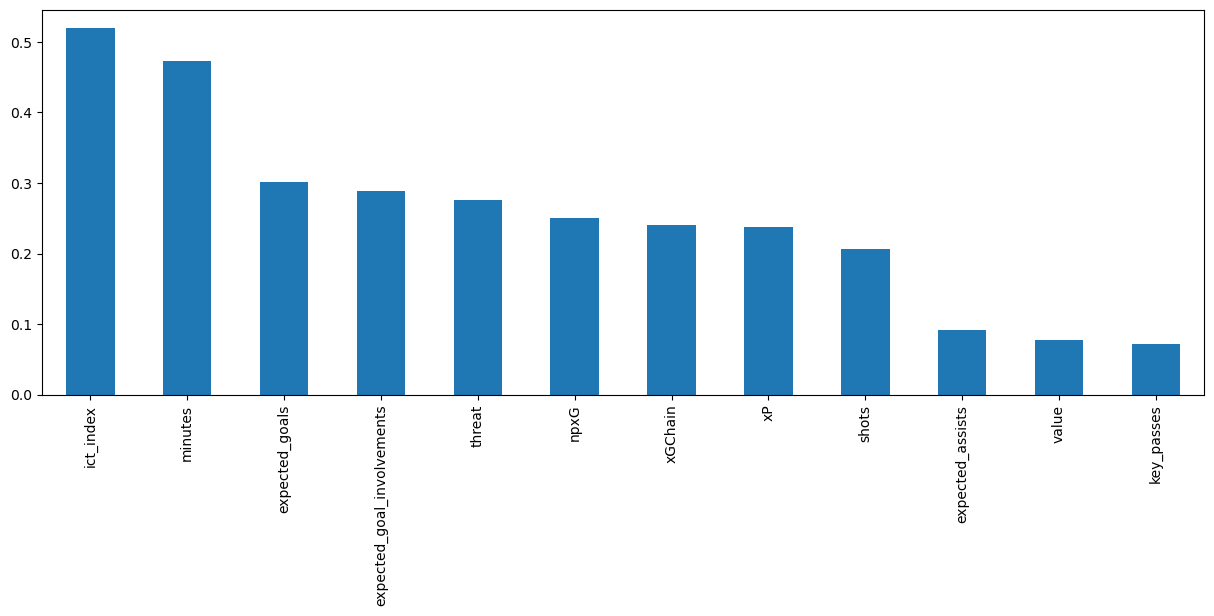

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [34]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, for_splits['target_train'])

selected_top_columns.get_support()

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False])

In [35]:
for_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

for_20_train = k_sel_X_train[for_20_columns]
for_20_test = k_sel_X_test[for_20_columns]


##### Model (MI)


###### Linear Model


In [36]:

MI_for_lin_reg = Linear_regression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_lin_reg =  [MI_for_lin_reg['train_RMSE'], MI_for_lin_reg['test_RMSE'], MI_for_lin_reg['cv_rmse'], MI_for_lin_reg['R2_train'], MI_for_lin_reg['R2_test']])

for_evaluation_stats

Training set RMSE: 1.2614694958271913
Test set RMSE: 1.1901489215184637
Training set R2: 0.7719410876297326
Test set R2: 0.8153925119845524
count    10.000000
mean      1.264835
std       0.131456
min       1.115911
25%       1.156799
50%       1.240573
75%       1.378406
max       1.477444
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393


###### DecisionTree Model


In [37]:
MI_for_dt_reg = DecisionTreeRegression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'])

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_dt_reg = [MI_for_dt_reg['train_RMSE'], MI_for_dt_reg['test_RMSE'], MI_for_dt_reg['cv_rmse'], MI_for_dt_reg['R2_train'], MI_for_dt_reg['R2_test']])

for_evaluation_stats



Training set RMSE: 0.05878963512522154
Test set RMSE: 1.6628219864210798
Training set R2: 0.9995046694981412
Test set R2: 0.6396386422514004
count    10.000000
mean      1.754623
std       0.116003
min       1.594789
25%       1.691068
50%       1.757782
75%       1.791517
max       2.012964
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469,0.058790
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149,1.662822
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835,1.754623
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941,0.999505
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393,0.639639


###### RandomForest Model


In [38]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_for_rf_reg = RandomForestRegression(for_20_train, for_20_test,
                               for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_rf_reg = [MI_for_rf_reg['train_RMSE'], MI_for_rf_reg['test_RMSE'], MI_for_rf_reg['cv_rmse'], MI_for_rf_reg['R2_train'], MI_for_rf_reg['R2_test']])

for_evaluation_stats

count    10.000000
mean      1.311910
std       0.122685
min       1.181996
25%       1.230318
50%       1.281680
75%       1.365550
max       1.546703
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469,0.058790,0.811476
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149,1.662822,1.257863
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835,1.754623,1.311910
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941,0.999505,0.905628
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393,0.639639,0.793788


###### XgBoost Model


In [39]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_for_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(MI_for_xgb_reg = [MI_for_xgb_reg['train_RMSE'], MI_for_xgb_reg['test_RMSE'], MI_for_xgb_reg['cv_rmse'], MI_for_xgb_reg['R2_train'], MI_for_xgb_reg['R2_test']])
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469,0.058790,0.811476,0.924027
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149,1.662822,1.257863,1.129866
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835,1.754623,1.311910,1.223136
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941,0.999505,0.905628,0.877633
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393,0.639639,0.793788,0.833620


In [40]:
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469,0.058790,0.811476,0.924027
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149,1.662822,1.257863,1.129866
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835,1.754623,1.311910,1.223136
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941,0.999505,0.905628,0.877633
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393,0.639639,0.793788,0.833620


# Best Stats


In [41]:
for_evaluation_stats

,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg
train_RMSE,0.916736,3.646883e-15,0.664471,0.905335,0.916736,3.648129e-15,0.665696,0.905335,0.958573,4.197829e-15,0.678311,0.924027,1.261469,0.058790,0.811476,0.924027
test_RMSE,0.849314,1.665591e+00,1.183077,1.181840,0.849314,1.769558e+00,1.190641,1.181840,0.885540,1.579681e+00,1.141688,1.129866,1.190149,1.662822,1.257863,1.129866
cv_rmse,0.934407,1.563492e+00,1.160216,1.177706,0.934407,1.586161e+00,1.161938,1.177706,0.971727,1.600419e+00,1.190240,1.223136,1.264835,1.754623,1.311910,1.223136
R2_train,0.879557,1.000000e+00,0.936723,0.882534,0.879557,1.000000e+00,0.936489,0.882534,0.868313,1.000000e+00,0.934060,0.877633,0.771941,0.999505,0.905628,0.877633
R2_test,0.905988,6.384374e-01,0.817580,0.817961,0.905988,5.918908e-01,0.815240,0.817961,0.897797,6.747739e-01,0.830120,0.833620,0.815393,0.639639,0.793788,0.833620


In [15]:
# Forwards
#### RF Model under the KBest performed better
